<a href="https://colab.research.google.com/github/Robinino99/Spanish_Wine_Classification/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data exploration : Spanish Wine Quality Dataset

##Data Dictionary

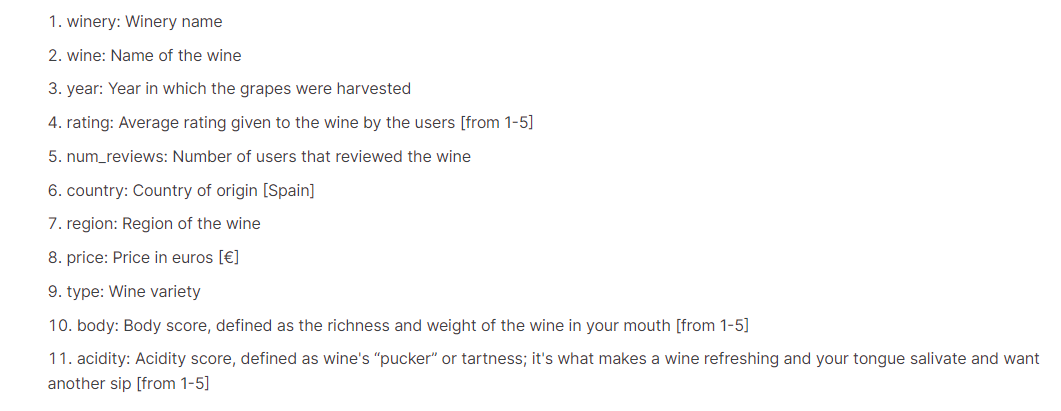

##Import packages

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Add Custom Function for Visualization

In [ ]:
# Univariative Plotting functions
# Basic imports for functions
#import matplotlib.pyplot as plt
#import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='price',figsize=(16,10),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='price',
                           figsize=(16,10)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
# load in the spanish wine dataset
fpath_1 = '/content/drive/MyDrive/Coding Dojo/CodingDojo/02-MachineLearning/Week09/wines_SPA.csv'
df_1 = pd.read_csv(fpath_1)
df_1.head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


###Data Cleaning

###Check for Null values

In [ ]:
df_1.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

###Investigate the Type feature (column)

In [ ]:
# identify the number of unique values for the column/feature
df_1['type'].value_counts()

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: type, dtype: int64

In [ ]:
# filter the [type] feature where isna
df_1[df_1['type'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7440,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7462,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN
7465,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7487,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


Looking at the above output, it seems that the null values for the type feature also impact the body & acidity features. In terms of the dataset this would add no value - we shall drop these rows.

In [ ]:
# drop the rows from type column where nan value
df_1.dropna(subset = ['type'], how = 'all', inplace = True)

In [ ]:
# filter the [type] feature where isna
df_1['type'].isna().sum()

0

In [ ]:
df_1.shape

(6955, 11)

###Drop/remove unnecessary columns

In [ ]:
# drop unncessary columns
df_1 = df_1.drop(columns = ['year', 'country'])

Reason for removal.
* Year feature won't add much value to our model.
* Country column has one default value being ('Espana') - no value to our model.

In [ ]:
df_1.head()

,winery,wine,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# overview of the price column
df_1['price'].describe()

count    6955.000000
mean       63.263349
std       155.636604
min         4.990000
25%        19.980000
50%        29.150000
75%        59.000000
max      3119.080000
Name: price, dtype: float64

##EDA Visualization

####Heatmap

Brief headmap to discern any correlations between features.

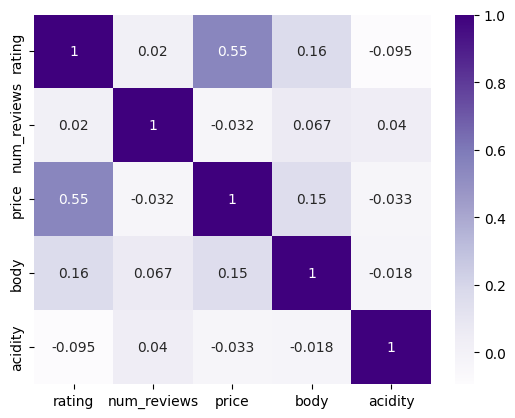

In [ ]:
# plot heatmap
corr = df_1.corr(numeric_only = True)

ax = sns.heatmap(corr, cmap = 'Purples', annot = True)

Based on the above graph, there is a strong correlation with price and the rating. (0.55)


###Rating Column


In [ ]:
# Evaluate the 'rating' feature
feature = 'rating'

In [ ]:
# Define the type of the feature
df_1[feature].dtype

dtype('float64')

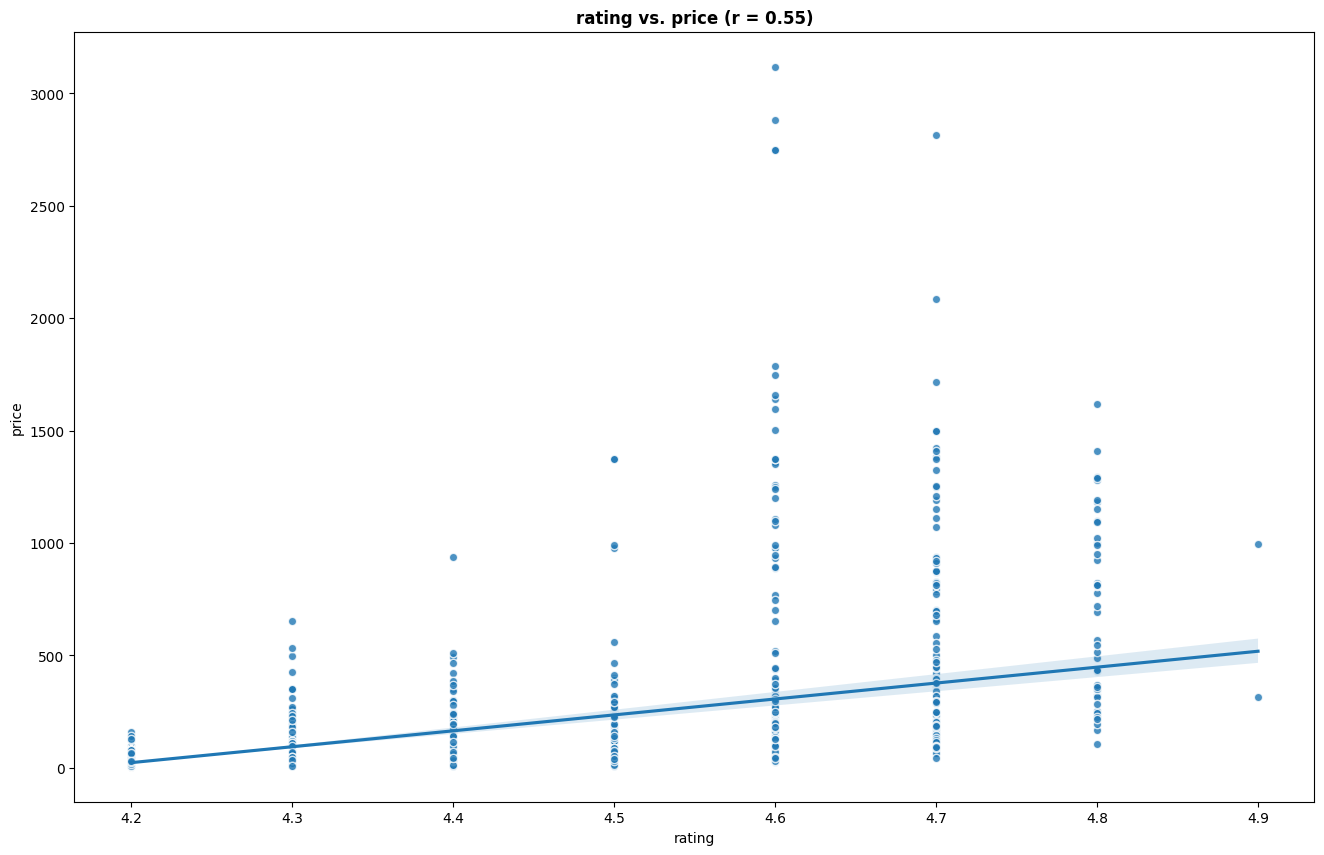

In [ ]:
# run the custom function to explore the relevant column type
plot_numeric_vs_target(df_1, feature);

As we can deduce from the above graph, a higher overall product (wine) rating is not solely contingent on a more expensive wine.

The sweet spot seems be in the range of sub 500 with a 4.6 rating.

####Body Column

In [ ]:
# Evaluate the 'body' feature
feature = 'body'

In [ ]:
# Define the type of the feature
df_1[feature].dtype

dtype('float64')

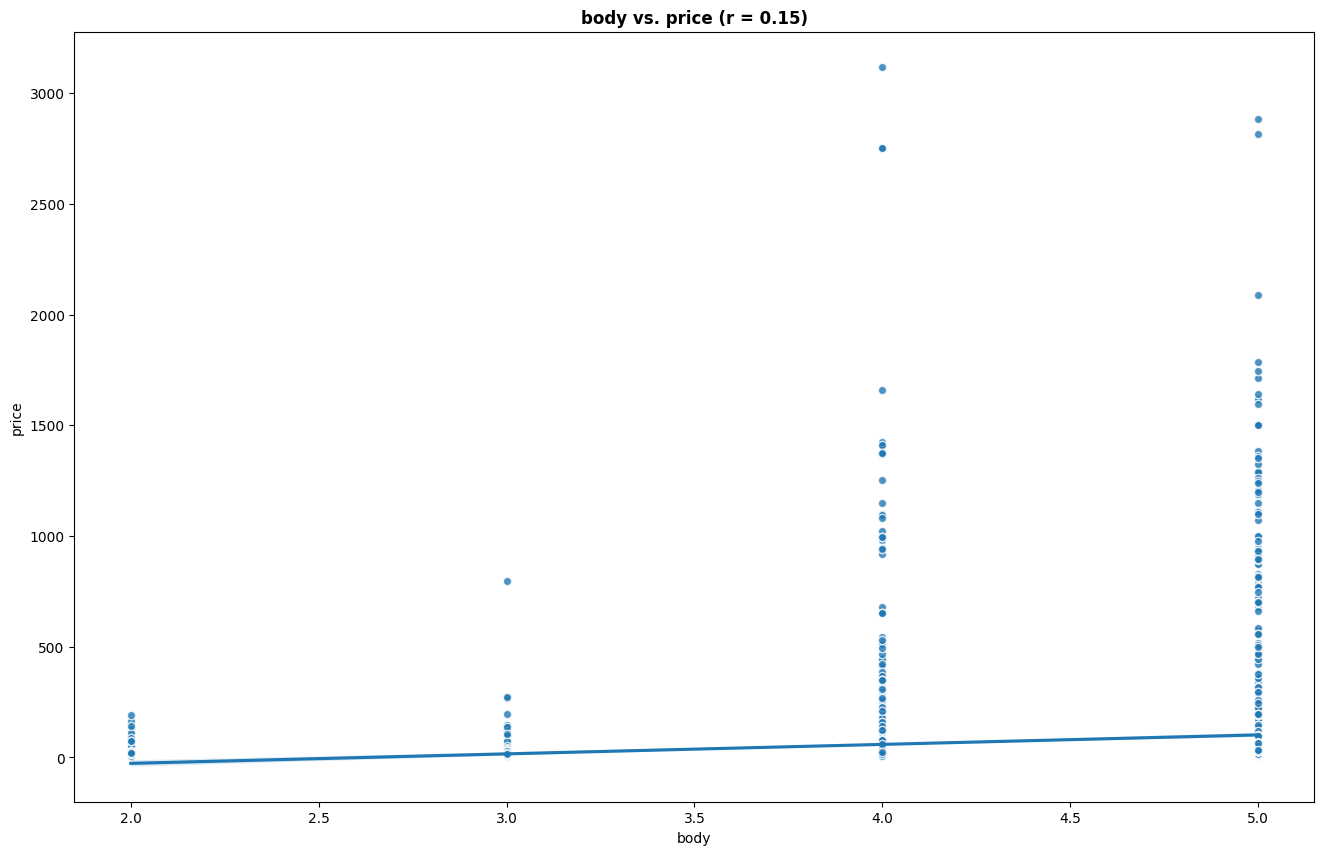

In [ ]:
plot_numeric_vs_target(df_1, feature);

There seems to be little to no correlation to the body of the wine versus the price.

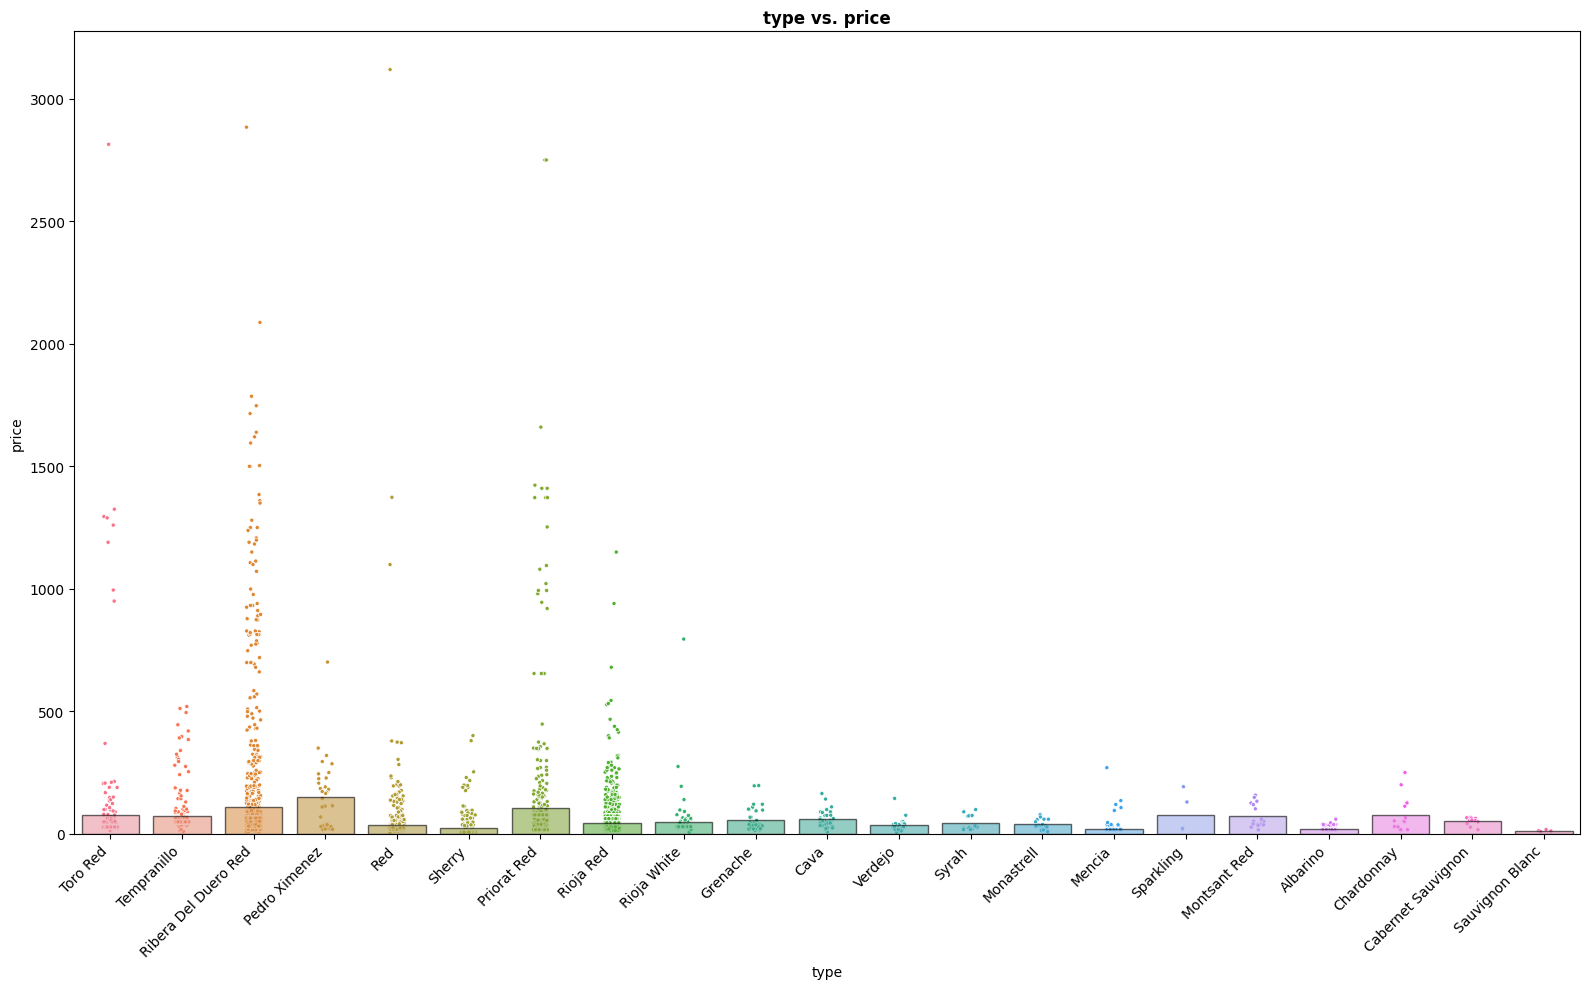

In [ ]:
#

plot_categorical_vs_target(df_1, 'type');

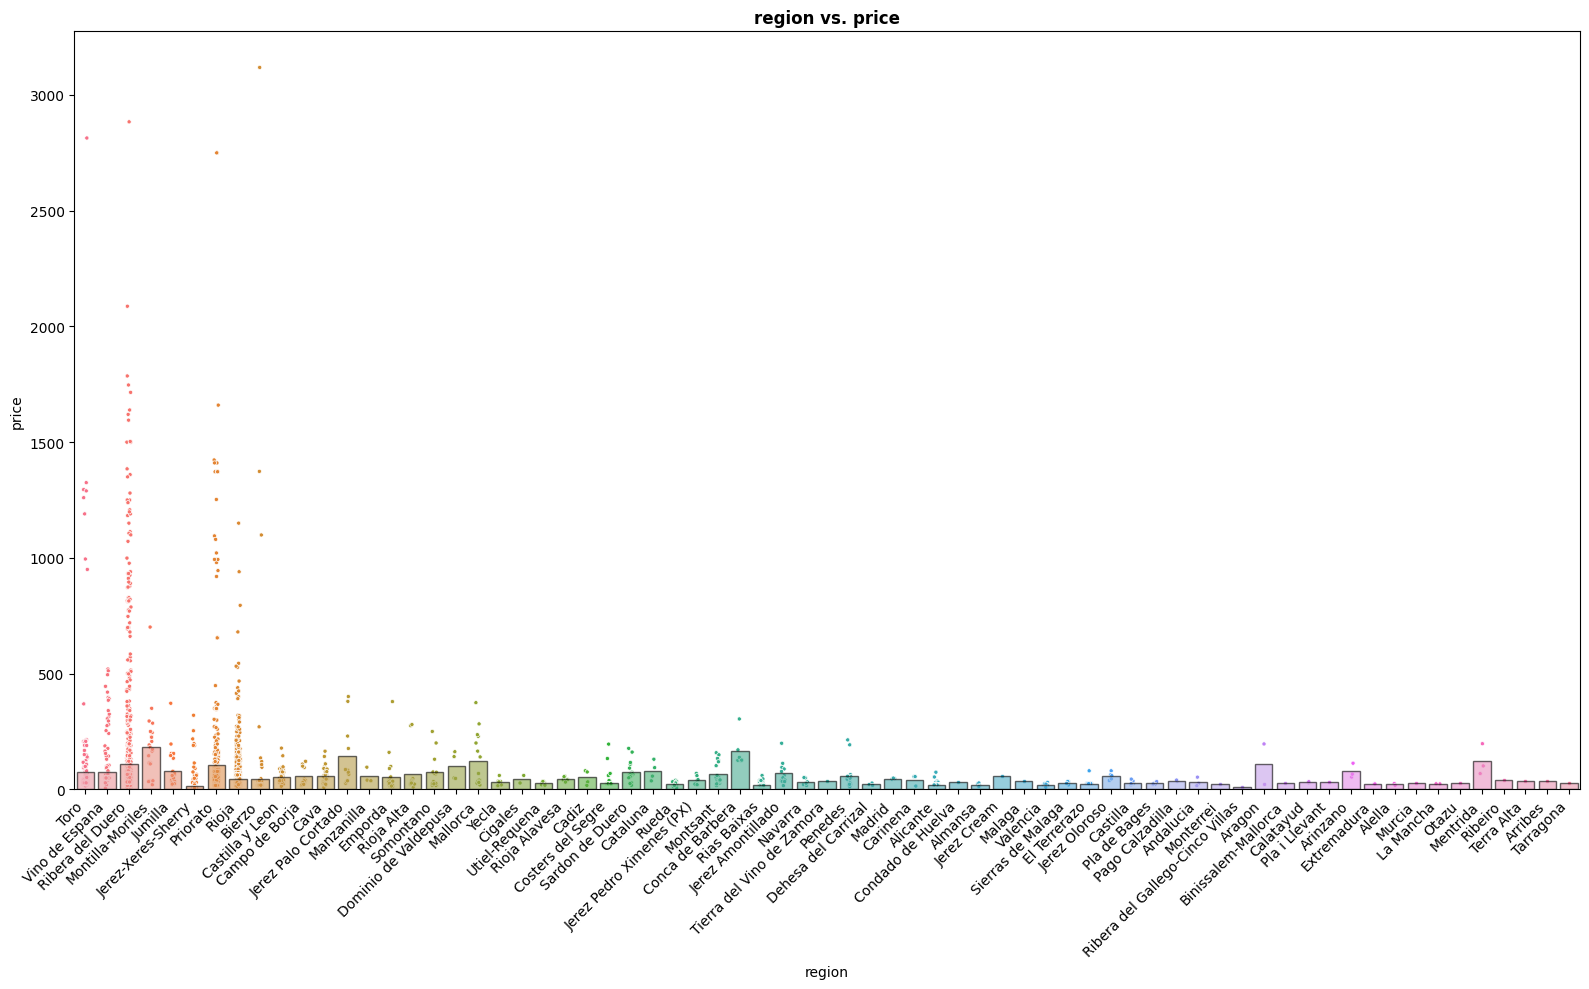

In [ ]:
# Explore the region vs target
plot_categorical_vs_target(df_1, 'region');

As depicted in the above graph the following regions have the highest prices:
* Rioja
* Bierzo
* Ribera del Duero
* Vino de Espana
* Priorato

##Further Exploration

###Price Feature (Column)

In [ ]:
# Group by the average rating per wine type
regional_averages = df_1.groupby('region', as_index = False).mean()

# select top 5 regions based on most expensive wines
top5_region_prices = regional_averages.nlargest(n = 5, columns = 'price')

# display top 5 regions
top5_region_prices.head()

<ipython-input-32-1db3c277e5fd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regional_averages = df_1.groupby('region', as_index = False).mean()


,region,rating,num_reviews,price,body,acidity
40,Montilla-Moriles,4.552000,91.520000,184.441200,5.0,1.0
18,Conca de Barbera,4.383333,192.333333,164.543333,4.0,3.0
29,Jerez Palo Cortado,4.409091,349.545455,144.475455,4.0,3.0
36,Mallorca,4.406250,152.125000,122.263498,4.0,3.0
38,Mentrida,4.300000,32.333333,121.986667,5.0,3.0


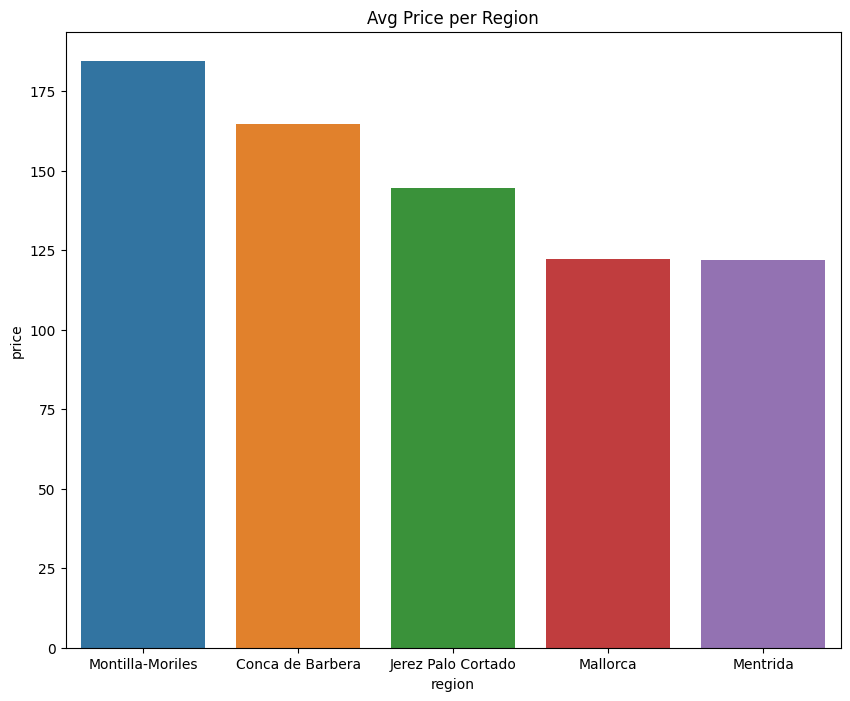

In [ ]:
# visualize the top 5 regions based on price
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = top5_region_prices, x = 'region', y = 'price')
ax.set_title('Avg Price per Region');


As depicted from the above graph these are the top 5 regions in terms of Wine prices.